# **Trabalho 2: Aula Assíncrona 18**

**Nome:** Luan Carlos Martins dos Santos, 23022464

**Questão 1)** Nesta atividade, utilize o k-Nearest Neighbor para verificar o desempenho do algoritmo de acordo com a engenharia de features empregada. Para tal fim, siga os seguintes passos:

In [1]:
# Importar as Bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA

In [2]:
# Comando para evitar mensagens de "warning"
warnings.filterwarnings('ignore')

# Comando para que os valores de saída do algoritmo seja com dois números significativos
pd.set_option('display.float_format',lambda x: '%.2f' % x)

**1.** Utilize o dataset ionosphere presente na pasta datasets para realizar uma tarefa de classificação binária.

In [3]:
# Importar o dataset 
df = pd.read_csv("/content/drive/MyDrive/Residência Tecnológica/ionosphere.data",header = None)

In [4]:
# Substituir "g" e "b" por 0 e 1, respectivamente
df.replace({'g':0, 'b': 1}, inplace=True)

**2.** Separe os dados de entrada e saída considerando que a coluna de índice 34 corresponde ao label dos dados de cada linha.

In [5]:
# Separar os atributos previsores
X = df.iloc[:,0:-1]

# Separar a Variável alvo
Y = df.iloc[:,-1]

**3.** Separe os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e random state = 0.

In [6]:
# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

**4.** Estabeleça arbitrariamente o número de vizinhos k = 5, inicialmente.

In [7]:
# Definir o número de vizinhos
k = 5

# Criacao do modelo
knn = KNeighborsClassifier(n_neighbors=k)

# Treinamento
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
# Teste
y_pred = knn.predict(X_test)

**5.** Realize a classificação e obtenha os seguintes resultados:

**(a)** Acurácia.

**(b)** Precisão.

**(c)** Recall.

**(d)** F1-Score.

**(e)** Plote a matriz de confusão obtida.

In [9]:
# Criar um Dataframe para armazenar os valores das métricas
df_score = pd.DataFrame(columns=['Metodologia','Acurácia','Precisão','Recall','F1-Score'])

In [10]:
# Cálculo da acurácia
acc_knn = accuracy_score(y_test,y_pred)

# Cálculo da Precisão
precision_knn = precision_score(y_test, y_pred)

# Cálculo do Recall
recall_knn = recall_score(y_test, y_pred)

# Cálculo do F1-score
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

# Armazenar os valores das métricas no Dataframe
df_score.at[0,'Metodologia'] = "Simples"
df_score.at[0,'Acurácia'] = acc_knn
df_score.at[0,'Precisão'] = precision_knn
df_score.at[0,'Recall'] = recall_knn
df_score.at[0,'F1-Score'] = f1_knn

# Eibir as métricas
df_score

,Metodologia,Acurácia,Precisão,Recall,F1-Score
0,Simples,0.84,0.94,0.66,0.77


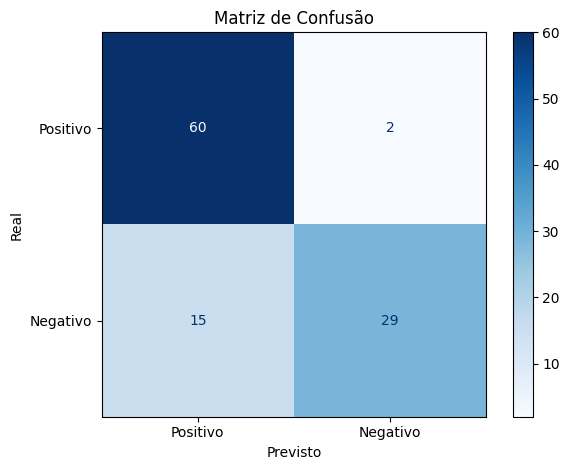

In [11]:
# Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Nome das classes de classificação da Matriz de Confusão
class_names = ['Positivo', 'Negativo']

# Criar um display para Matriz de Confusão
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotar a Matriz de Confusão com variações de cores azuis
disp_1.plot(cmap=plt.cm.Blues)

# Alterar os rótulos dos eixos da Matriz de Confusão
disp_1.ax_.set(xlabel='Previsto', ylabel='Real')

# Entitular a Matriz de Confusão
plt.title('Matriz de Confusão')

plt.tight_layout()

# Exibir a Matriz de Confusão
plt.show()

**6.** Repita todo o processo dos itens 1 até 5 utilizando o método de Seleção de Features por limiar de variância,
considerando o limiar de 35%.

*   **1.** Utilize o dataset ionosphere presente na pasta datasets para realizar uma tarefa de classificação binária. **(Este item não carece repetir)**

*   **2.** Separe os dados de entrada e saída considerando que a coluna de índice 34 corresponde ao label dos dados
de cada linha. **(Este item não carece repetir)**

In [12]:
# Estabelecer o limiar de variância
limiar_de_variancia = 0.35

# Criar o modelo de seleção de features
selecao = VarianceThreshold(threshold = limiar_de_variancia)

# Selecionar as features
features_selecionadas = selecao.fit_transform(X)

# Verificar a estrutura dos dados selecionados
print("Formato dos dados Originais:", np.shape(X))
print("Formato dos dados após a seleção de features:", np.shape(features_selecionadas))

Formato dos dados Originais: (351, 34)
Formato dos dados após a seleção de features: (351, 6)


**3.** Separe os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e
random state = 0.

In [13]:
# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features_selecionadas, Y, test_size = 0.3, random_state = 0)

**4.** Estabeleça arbitrariamente o número de vizinhos k = 5, inicialmente.

In [14]:
# Definir o número de vizinhos
k = 5

# Criação do modelo
knn = KNeighborsClassifier(n_neighbors=k)

# Treinamento
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
# Teste
y_pred = knn.predict(X_test)

**5.** Realize a classificação e obtenha os seguintes resultados:

**(a)** Acurácia.

**(b)** Precisão.

**(c)** Recall.

**(d)** F1-Score.

**(e)** Plote a matriz de confusão obtida.

In [16]:
# Cálculo da acurácia
acc_knn = accuracy_score(y_test,y_pred)

# Cálculo da Precisão
precision_knn = precision_score(y_test, y_pred)

# Cálculo do Recall
recall_knn = recall_score(y_test, y_pred)

# Cálculo do F1-score
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

# Armazenar os valores das métricas no Dataframe
df_score.at[1,'Metodologia'] = "Com seleção de Features por limiar de variância"
df_score.at[1,'Acurácia'] = acc_knn
df_score.at[1,'Precisão'] = precision_knn
df_score.at[1,'Recall'] = recall_knn
df_score.at[1,'F1-Score'] = f1_knn

# Exibir as métricas
df_score

,Metodologia,Acurácia,Precisão,Recall,F1-Score
0,Simples,0.84,0.94,0.66,0.77
1,Com seleção de Features por limiar de variância,0.81,0.90,0.61,0.73


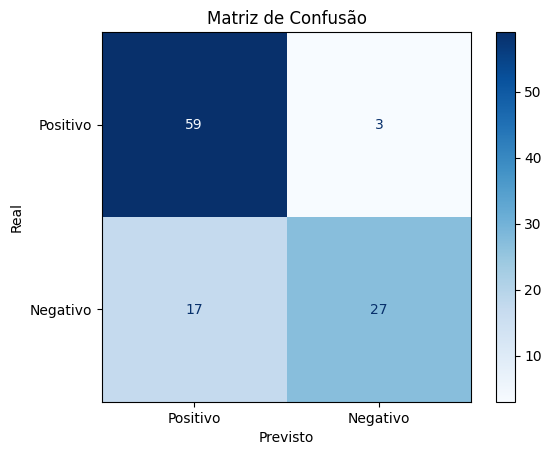

In [17]:
# Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Nome das classes de classificação da Matriz de Confusão
class_names = ['Positivo', 'Negativo']

# Criar um display para Matriz de Confusão
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotar a Matriz de Confusão com variações de cores azuis
disp_2.plot(cmap=plt.cm.Blues)

# Alterar os rótulos dos eixos da Matriz de Confusão
disp_2.ax_.set(xlabel='Previsto', ylabel='Real')

# Entitular a Matriz de Confusão
plt.title('Matriz de Confusão')

# Exibir a Matriz de Confusão
plt.show()

**7.** Repita todo o processo itens 1 até 5 utilizando o método de Extração de Features por Análise de Componentes
Principais (PCA), considerando a porcentagem de informação a sermantida no prolema de 85%.

*   **1.** Utilize o dataset ionosphere presente na pasta datasets para realizar uma tarefa de classificação binária. **(Este item não carece repetir)**

*   **2.** Separe os dados de entrada e saída considerando que a coluna de índice 34 corresponde ao label dos dados
de cada linha. **(Este item não carece repetir)**

In [18]:
# Realizar o PCA entre as features
pca = PCA(n_components=15)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum()*100
total_var

86.14680276915536

**3.** Separe os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e
random state = 0.

In [19]:
# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size = 0.3, random_state = 0)

**4.** Estabeleça arbitrariamente o número de vizinhos k = 5, inicialmente.

In [20]:
# Definir o número de vizinhos
k = 5

# Criação do modelo
knn = KNeighborsClassifier(n_neighbors=k)

# Treinamento
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
# Teste
y_pred = knn.predict(X_test)

**5.** Realize a classificação e obtenha os seguintes resultados:

**(a)** Acurácia.

**(b)** Precisão.

**(c)** Recall.

**(d)** F1-Score.

**(e)** Plote a matriz de confusão obtida.

In [22]:
# Cálculo da acurácia
acc_knn = accuracy_score(y_test,y_pred)

# Cálculo da Precisão
precision_knn = precision_score(y_test, y_pred)

# Cálculo do Recall
recall_knn = recall_score(y_test, y_pred)

# Cálculo do F1-score
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

# Armazenar os valores das métricas no Dataframe
df_score.at[2,'Metodologia'] = "Com PCA"
df_score.at[2,'Acurácia'] = acc_knn
df_score.at[2,'Precisão'] = precision_knn
df_score.at[2,'Recall'] = recall_knn
df_score.at[2,'F1-Score'] = f1_knn

# Exibir as métricas
df_score

,Metodologia,Acurácia,Precisão,Recall,F1-Score
0,Simples,0.84,0.94,0.66,0.77
1,Com seleção de Features por limiar de variância,0.81,0.90,0.61,0.73
2,Com PCA,0.87,0.94,0.73,0.82


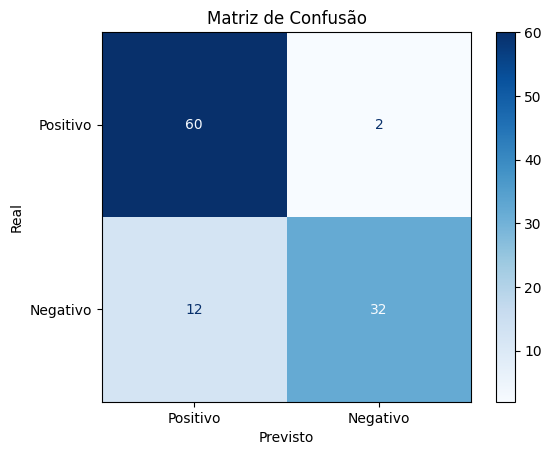

In [23]:
# Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Nome das classes de classificação da Matriz de Confusão
class_names = ['Positivo', 'Negativo']

# Criar um display para Matriz de Confusão
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotar a Matriz de Confusão com variações de cores azuis
disp_3.plot(cmap=plt.cm.Blues)

# Alterar os rótulos dos eixos da Matriz de Confusão
disp_3.ax_.set(xlabel='Previsto', ylabel='Real')

# Entitular a Matriz de Confusão
plt.title('Matriz de Confusão')

# Exibir a Matriz de Confusão
plt.show()

**8.** Considerando os dados transformados através do uso da PCA, repita todo o processo dos itens 1 a 5, mas aplique a técnica de Validação Cruzada por k-fold para encontrar o número de vizinhos mais próximos ideal para o problema. Considere variar k de 1 até 20, e considere o número de pastas do k-fold (o parâmetro cv da função cross_val_score) igual a 5.

*   **1.** Utilize o dataset ionosphere presente na pasta datasets para realizar uma tarefa de classificação binária. **(Este item não carece repetir)**

*   **2.** Separe os dados de entrada e saída considerando que a coluna de índice 34 corresponde ao label dos dados
de cada linha. **(Este item não carece repetir)**

In [24]:
# Vetor de possíveis valores de k
k_range = range(1, 20)

# Declaração do vetor que armazenará o score do modelo para cada valor de k
k_scores = []

**3.** Separe os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e random state = 0.

In [25]:
# Separacao dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size = 0.3, random_state = 0)

**4.** Estabeleça arbitrariamente o número de vizinhos k = 5, inicialmente. **(Neste caso, k deve variar de 1 a 20)**

In [26]:
# Loop para treinar o modelo para cada valor de k 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

k: 1 Acurácia: 90.0
k: 2 Acurácia: 83.0
k: 3 Acurácia: 87.0
k: 4 Acurácia: 84.0
k: 5 Acurácia: 86.0
k: 6 Acurácia: 84.0
k: 7 Acurácia: 86.0
k: 8 Acurácia: 84.0
k: 9 Acurácia: 84.0
k: 10 Acurácia: 84.0
k: 11 Acurácia: 84.0
k: 12 Acurácia: 84.0
k: 13 Acurácia: 84.0
k: 14 Acurácia: 84.0
k: 15 Acurácia: 84.0
k: 16 Acurácia: 82.0
k: 17 Acurácia: 83.0
k: 18 Acurácia: 82.0
k: 19 Acurácia: 83.0


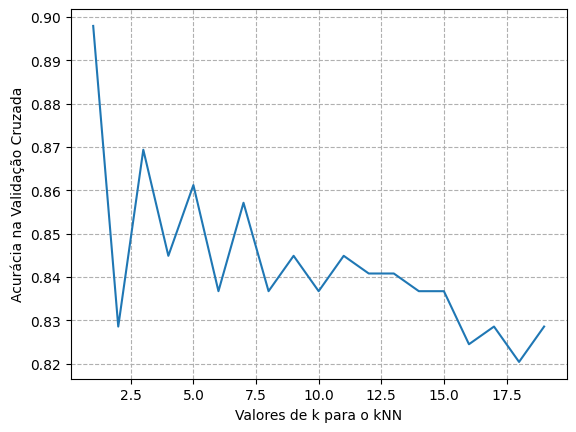

In [27]:
# Exibir o score do modelo para cada valor de k
for i in range(len(k_scores)):
    print("k:", k_range[i],  "Acurácia:", round(k_scores[i],2)*100)

# Plotar o score do modelo para cada valor de k
plt.plot(k_range, k_scores)
plt.xlabel('Valores de k para o kNN')
plt.ylabel('Acurácia na Validação Cruzada')
plt.grid(linestyle = "dashed")
plt.show()

In [28]:
# Criação do modelo com o melhor valor de k
knn = KNeighborsClassifier(n_neighbors = np.argmax(k_scores)+1)

# Treinamento
knn.fit(X_train,y_train)

# Teste
y_pred = knn.predict(X_test)

**5.** Realize a classificação e obtenha os seguintes resultados:

**(a)** Acurácia.

**(b)** Precisão.

**(c)** Recall.

**(d)** F1-Score.

**(e)** Plote a matriz de confusão obtida.

In [29]:
# Cálculo da acurácia
acc_knn = accuracy_score(y_test,y_pred)

# Cálculo da Precisão
precision_knn = precision_score(y_test, y_pred)

# Cálculo do Recall
recall_knn = recall_score(y_test, y_pred)

# Cálculo do F1-score
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

df_score.at[3,'Metodologia'] = "Com PCA e com Validação Cruzada por K-fold"
df_score.at[3,'Acurácia'] = acc_knn
df_score.at[3,'Precisão'] = precision_knn
df_score.at[3,'Recall'] = recall_knn
df_score.at[3,'F1-Score'] = f1_knn

# Exibir as métricas
df_score

,Metodologia,Acurácia,Precisão,Recall,F1-Score
0,Simples,0.84,0.94,0.66,0.77
1,Com seleção de Features por limiar de variância,0.81,0.90,0.61,0.73
2,Com PCA,0.87,0.94,0.73,0.82
3,Com PCA e com Validação Cruzada por K-fold,0.92,0.97,0.82,0.89


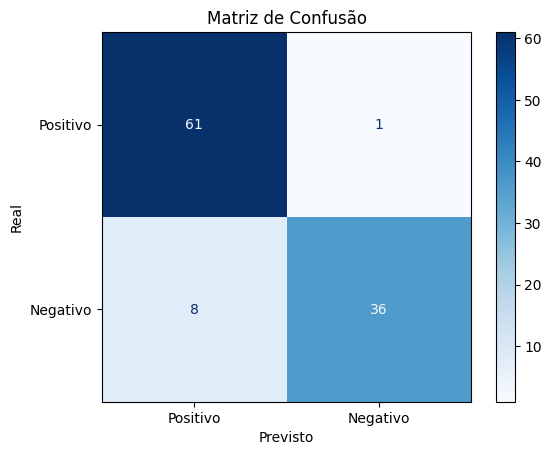

In [30]:
# Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Nome das classes de classificação da Matriz de Confusão
class_names = ['Positivo', 'Negativo']

# Criar um display para Matriz de Confusão
disp_4 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotar a Matriz de Confusão com variações de cores azuis
disp_4.plot(cmap='Blues')

# Alterar os rótulos dos eixos da Matriz de Confusão
disp_4.ax_.set(xlabel='Previsto', ylabel='Real')

# Entitular a Matriz de Confusão
plt.title('Matriz de Confusão') 

# Exibir a Matriz de Confusão
plt.show()

**Questão 2)** Compare os resultados obtidos em todos os processos do item anterior e justifique as diferenças obtidas através dos conceitos de engenharia de features estudados durante as aulas síncronas.

A tabela (Data Frame) a seguir consolida a maioria das métricas obtidas à partir das quatro metodologias estudas anteriormente.

In [31]:
# Exibir as métricas
df_score

,Metodologia,Acurácia,Precisão,Recall,F1-Score
0,Simples,0.84,0.94,0.66,0.77
1,Com seleção de Features por limiar de variância,0.81,0.90,0.61,0.73
2,Com PCA,0.87,0.94,0.73,0.82
3,Com PCA e com Validação Cruzada por K-fold,0.92,0.97,0.82,0.89


Com base nesta Tabela, é possível concluir que a metodologia "KNN com PCA e Validação Cruzada por K-fold" é a melhor maneira para treinar o algoritmo KNN, pois, de acordo com as métricas, esta metodologia "entrega" o melhor resultado. Nesse sentido, convém lembrar os significados conceituais destas métricas.

*   Acurácia: medida usada para avaliar a precisão global do modelo. Matematicamente, pode ser calculada da seguinte forma.

> **Acurácia** = (Número de previsões corretas) / (Número total de previsões)

*   Precisão: mede a proporção de previsões corretas positivas em relação ao total de previsões positivas. É uma métrica útil quando o objetivo é minimizar os falsos positivos. Logo, matematicamente, corresponde ao modelo a seguir.


> **Precisão** = (Verdadeiros positivos) / (Verdadeiros positivos + Falsos positivos)

*   Recall: também conhecido como revocação ou sensibilidade, mede a proporção de previsões corretas positivas em relação ao total de instâncias verdadeiramente positivas na amostra de dados. Essa métrica é relevante quando o objetivo é minimizar os falsos negativos. Portanto, pode-se calcular esta métrica conforme a equação abaixo.

> **Recall** = (Verdadeiros positivos) / (Verdadeiros positivos + Falsos negativos)

*   F1-Score: média harmônica entre a precisão e o recall. Ele fornece um equilíbrio entre essas duas métricas e é útil quando há um desequilíbrio entre as classes do conjunto de dados. Matematicamente, é calculado de acordo com a fórmula seguinte.

> **F1-Score** = 2 * (Precisão * Recall) / (Precisão + Recall)





Além disso, convém analisar as matrizes de confusão. Confira a seguir!

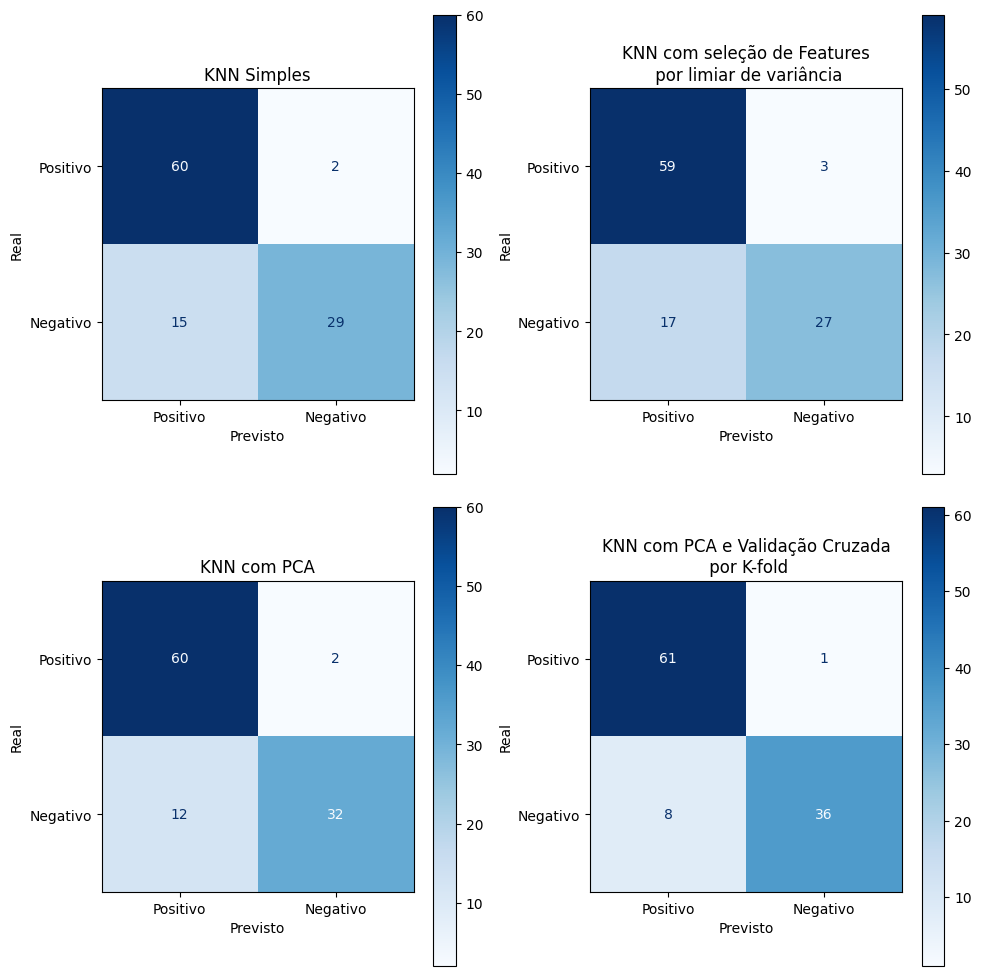

In [32]:
# Criar uma estrutura para 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Exibir a matriz de Confusão da metodologia simples
disp_1.plot(ax=axes[0, 0], cmap='Blues')
# Alterar os rótulos dos eixos da Matriz de Confusão deste subplot
disp_1.ax_.set(xlabel='Previsto', ylabel='Real')
# Entitular a matriz de Confusão deste subplot
axes[0, 0].set_title("KNN Simples")

# Exibir a matriz de Confusão da metodologia com seleção de Features por limiar de variância
disp_2.plot(ax=axes[0, 1], cmap='Blues')
# Alterar os rótulos dos eixos da Matriz de Confusão deste subplot
disp_2.ax_.set(xlabel='Previsto', ylabel='Real')
# Entitular a matriz de Confusão deste subplot
axes[0, 1].set_title("KNN com seleção de Features\n por limiar de variância")

# Exibir a matriz de Confusão da metodologia com PCA
disp_3.plot(ax=axes[1, 0], cmap='Blues')
# Alterar os rótulos dos eixos da Matriz de Confusão deste subplot
disp_3.ax_.set(xlabel='Previsto', ylabel='Real')
# Entitular a matriz de Confusão deste subplot
axes[1, 0].set_title("KNN com PCA")

# Exibir a matriz de Confusão da metodologia com PCA
disp_4.plot(ax=axes[1, 1], cmap='Blues')
# Alterar os rótulos dos eixos da Matriz de Confusão deste subplot
disp_4.ax_.set(xlabel='Previsto', ylabel='Real')
# Entitular a matriz de Confusão deste subplot
axes[1, 1].set_title("KNN com PCA e Validação Cruzada\n por K-fold")

# Ajustar os espaços entre os subplots
plt.tight_layout()

# Exibir as matrizes de confusão
plt.show()

Com base nas matrizes de confusão, também, é possível perceber que a metodologia "KNN com PCA e Validação Cruzada por K-fold" é a melhor maneira para treinar o algoritmo KNN. De acordo com a matriz de confusão desta metodologia, o algoritmo acertou 61 previsões positivas (verdadeiro positivo) e acertou 36 previsões negativas (vergadeiro negativo) e, com isso, acertou mais que outras metodologias.

Consequentemente, foi a metodologia que menos errou, isto é, 8 erros em previsões positivas (falso positivo), e 1 erro em previsão negativa (falso negativo). Diante disso, a matriz de confusão do método "KNN com PCA e Validação Cruzada por K-fold" justifica a obtenção dos melhores resultados para as métricas "Acurácia, Precisão, Recall, e F1-Score" em comparação as outras metologias deste trabalho.

Diante disso, conclui-se que, para este modelo de negócio, o KNN se adapta melhor aos dados com k = 1 e, do ponto de vista de Engenharia de Features, é fundamental o uso de transformação em componentes principais, PCA, pois o dataset original possui 33 features, mas, de acordo com o estudo feito neste trabalho, o algoritmo KNN se adaptou melhor com o uso de 15 componentes principais.